In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV





In [6]:
df = pd.read_csv('../resources/cleaned_extended_data3.csv')



In [7]:
#listing the columns
df.columns


Index(['SO_x', 'CSW%', 'wRAA', 'Barrels', 'RBI_x', 'IFFB', 'competitive_runs',
       'Age', 'HR', 'R_y', 'RBI_y', 'SB', 'BB', 'SO_y', 'OBP', 'SLG', 'OPS',
       'wOBA', 'WAR', 'BABIP', 'LD%', 'GB%', 'Contact%', 'SwStr%',
       'next_year_hits'],
      dtype='object')

In [8]:
#show a correlation matrix for the data dataframe

correlation_matrix = df.corr()
print(correlation_matrix)


                      SO_x      CSW%      wRAA   Barrels     RBI_x      IFFB  \
SO_x              1.000000 -0.023525  0.403446  0.781450  0.765493  0.443980   
CSW%             -0.023525  1.000000 -0.238947 -0.153406 -0.334841 -0.301213   
wRAA              0.403446 -0.238947  1.000000  0.713637  0.672109  0.231930   
Barrels           0.781450 -0.153406  0.713637  1.000000  0.861989  0.454363   
RBI_x             0.765493 -0.334841  0.672109  0.861989  1.000000  0.607702   
IFFB              0.443980 -0.301213  0.231930  0.454363  0.607702  1.000000   
competitive_runs  0.551527 -0.342176  0.386403  0.475256  0.694524  0.485146   
Age              -0.018252 -0.084588  0.022247  0.034146  0.067902  0.011542   
HR                0.469922 -0.129069  0.442702  0.591990  0.543598  0.356985   
R_y               0.418216 -0.266421  0.400393  0.445400  0.507953  0.339455   
RBI_y             0.428869 -0.243931  0.403433  0.525776  0.568158  0.366147   
SB                0.134933 -0.135310  0.

In [9]:
import xgboost as xgb

# Separate the features and target variable
X = df.drop('next_year_hits', axis=1)
y = df['next_year_hits']

# Create the XGBoost model
model = xgb.XGBRegressor()

# Fit the model
model.fit(X, y)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [10]:
#splitting the datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [11]:
from sklearn.preprocessing import StandardScaler
# Create an instance of the scaler
scaler = StandardScaler()

# Scale the datasets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
#instantiate the XGBRegressor
import xgboost as xgb

# Define hyperparameters
params = {
    'colsample_bytree': 0.7,
    'learning_rate': 0.3,
    'max_depth': 5,
    'min_child_weight': 1,
    'n_estimators': 200,
    'subsample': 0.7
}

# Create an XGBoost model with specified hyperparameters
model = xgb.XGBRegressor(**params)  # For regression
# or
# model = xgb.XGBClassifier(**params)  # For classification

# Train the model with your data
model.fit(X_train, y_train)  # Replace X_train and y_train with your training data



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [13]:
# Fit the model
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [14]:
#make predictions in the training data
y_pred = model.predict(X_train)

# Calculate the mean_squared_error and the r-squared value
# for the testing data
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

#calculate the mean average error
mae = mean_absolute_error(y_train, y_pred)


print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2 ): {r2}")



Mean Squared Error (MSE): 96.42315972665426
Mean Absolute Error (MAE): 7.3818056933250515
R-squared (R2 ): 0.964233630168376


In [15]:
#make predictions in the test set
y_pred = model.predict(X_test)


In [16]:
from sklearn.metrics import mean_absolute_error
# Calculate the mean_squared_error and the r-squared value
# for the testing data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#calculate the mean average error
mae = mean_absolute_error(y_test, y_pred)


print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2 ): {r2}")



Mean Squared Error (MSE): 382.80788192567115
Mean Absolute Error (MAE): 14.319620978861336
R-squared (R2 ): 0.8578701053604944


In [17]:
# run the hyperparameter tuning
param_grid = {
    'learning_rate': [0.1, 0.3],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7],
    'n_estimators': [100, 200]}
grid = GridSearchCV(model, param_grid, n_jobs=-1, cv=3)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)




{'colsample_bytree': 0.5, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.7}
0.7679782074457856
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


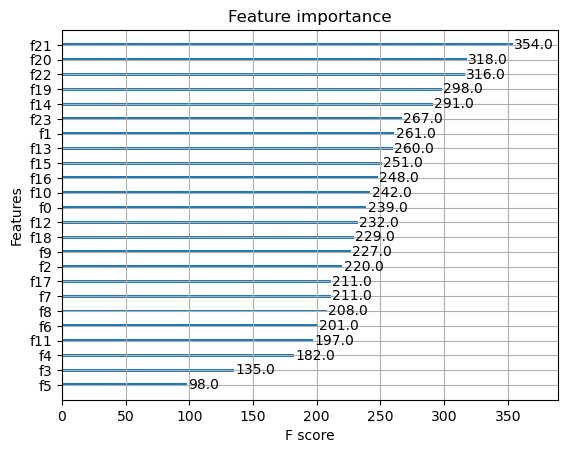

In [18]:
import matplotlib.pyplot as plt

xgb.plot_importance(model)
plt.show()





